In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file_path = 'C:\K_digital\source\data\chipotle.csv'
chipo = pd.read_csv(file_path)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [13]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [12]:
chipo['item_price'] = chipo.item_price.str.slice(1,).astype(float)

In [30]:
# 주문이 많은 메뉴 기준으로 정렬한 테이블
chipo.groupby('item_name')[['quantity', 'item_price']].sum().sort_values('quantity', ascending=0)

,quantity,item_price
item_name,,
Chicken Bowl,761,7342.73
Chicken Burrito,591,5575.82
Chips and Guacamole,506,2201.04
Steak Burrito,386,3851.43
Canned Soft Drink,351,438.75
Chips,230,494.34
Steak Bowl,221,2260.19
Bottled Water,211,302.56
Chips and Fresh Tomato Salsa,130,361.36


In [31]:
# 주문이 많은 메뉴 Top 10
chipo.groupby('item_name')[['quantity', 'item_price']].sum().sort_values('quantity', ascending=0).head(10)

,quantity,item_price
item_name,,
Chicken Bowl,761,7342.73
Chicken Burrito,591,5575.82
Chips and Guacamole,506,2201.04
Steak Burrito,386,3851.43
Canned Soft Drink,351,438.75
Chips,230,494.34
Steak Bowl,221,2260.19
Bottled Water,211,302.56
Chips and Fresh Tomato Salsa,130,361.36


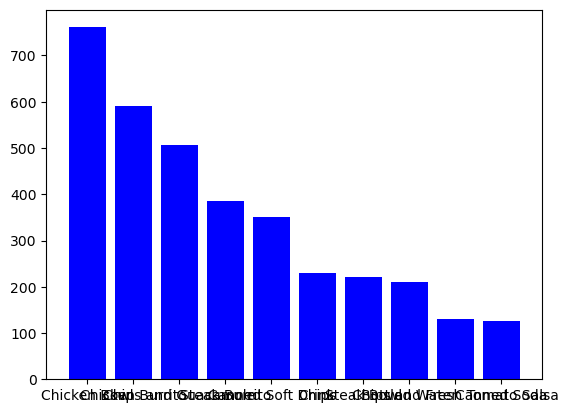

In [95]:
# 주문이 많은 메뉴 Top 10 시각화
Top = chipo.groupby('item_name')[['quantity', 'item_price']].sum().sort_values('quantity',
                                                                               ascending=0).head(10)

plt.bar(Top.index, Top.quantity, align='center',
        color='blue')

plt.show()

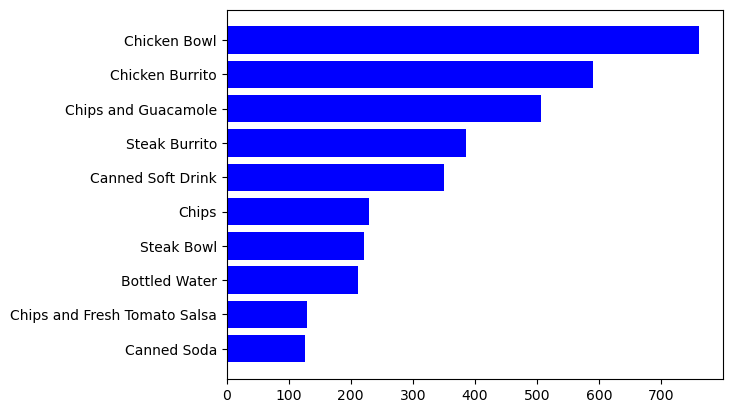

In [99]:
# 수평 막대 그래프
TopH = Top.sort_values('quantity')
plt.barh(TopH.index, TopH.quantity, align='center',
        color='blue')

plt.show()

In [33]:
# 주문이 적은 메뉴 Worst 10
chipo.groupby('item_name')[['quantity', 'item_price']].sum().sort_values('quantity').head(10)

,quantity,item_price
item_name,,
Carnitas Salad,1,8.99
Veggie Crispy Tacos,1,8.49
Chips and Mild Fresh Tomato Salsa,1,3.00
Crispy Tacos,2,14.80
Salad,2,14.80
Bowl,4,29.60
Steak Salad,4,35.66
Veggie Salad,6,50.94
Carnitas Salad Bowl,6,66.34


In [100]:
wor = chipo.groupby('item_name')[['quantity', 'item_price']].sum().sort_values('quantity').head(10)

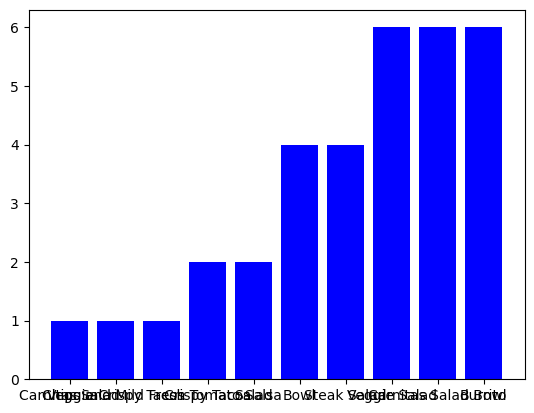

In [101]:
# 주문이 적은 메뉴 Worst 10 시각화
plt.bar(wor.index, wor.quantity, align='center',
        color='blue')

plt.show()

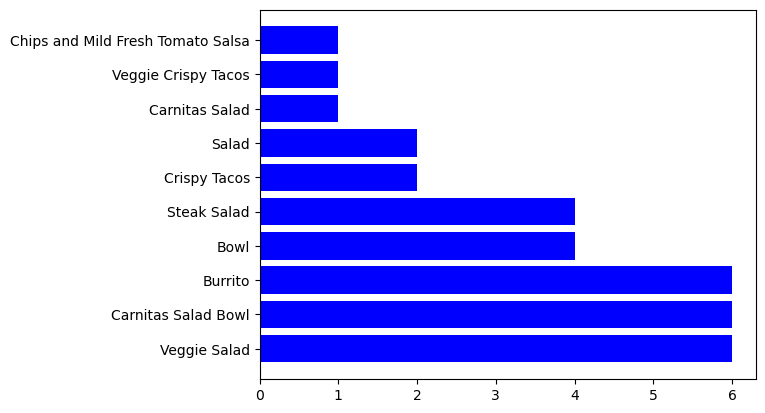

In [102]:
# 수평 막대 그래프
worH = wor.sort_values('quantity', ascending = 0)
plt.barh(worH.index, worH.quantity, align='center',
        color='blue')

plt.show()

In [107]:
# 메뉴당 가격(높은 순으로 정렬)
quan = chipo.groupby('item_name')[['quantity', 'item_price']].sum().sort_values('quantity', ascending=0)
quan['menu_price'] = quan.item_price / quan.quantity
quan.sort_values('menu_price', ascending=0).menu_price

item_name
Steak Salad Bowl                         11.083548
Carnitas Salad Bowl                      11.056667
Barbacoa Salad Bowl                      10.640000
Carnitas Bowl                            10.376197
Steak Bowl                               10.227104
Barbacoa Bowl                            10.187273
Veggie Salad Bowl                        10.138889
Barbacoa Soft Tacos                      10.018400
Barbacoa Crispy Tacos                    10.017500
Chicken Salad Bowl                        9.989837
Steak Burrito                             9.977798
Veggie Bowl                               9.976897
Carnitas Burrito                          9.963833
Steak Crispy Tacos                        9.926111
Barbacoa Burrito                          9.832418
Carnitas Crispy Tacos                     9.745000
Chicken Bowl                              9.648791
Veggie Burrito                            9.636804
Steak Soft Tacos                          9.572321
Chicken Crispy Tacos 

In [108]:
# 주문번호별 주문개수 및 총 비용
chipo.groupby('order_id')[['quantity', 'item_price']].sum()

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


In [132]:
# 음식에 아무 옵션도 들어가지 않았던 주문들만 추출 이걸 사용하면 순수 메뉴 가격 도출 가능
chipo[chipo.choice_description.isna()].item_price

0       2.39
3       2.39
6       1.69
10      4.45
14      4.45
        ... 
4600    4.45
4605    4.45
4613    2.15
4614    1.50
4616    4.45
Name: item_price, Length: 1246, dtype: float64

<AxesSubplot:>

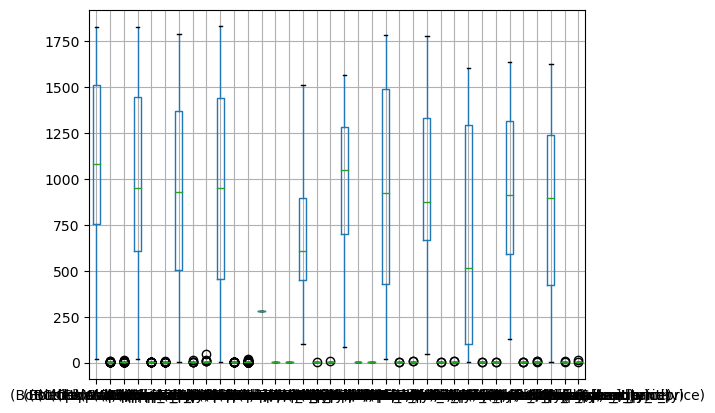

In [136]:
chipono.groupby('item_name').boxplot(chipono.item_price)

In [124]:
chipono = chipo[chipo.choice_description.isna()]
chipono.groupby('item_name')['quantity', 'item_price'].sum()

C:\Users\admin\AppData\Local\Temp/ipykernel_21220/3294876549.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chipono.groupby('item_name')['quantity', 'item_price'].sum()


,quantity,item_price
item_name,,
Bottled Water,211,302.56
Chips,230,494.34
Chips and Fresh Tomato Salsa,130,361.36
Chips and Guacamole,506,2201.04
Chips and Mild Fresh Tomato Salsa,1,3.00
Chips and Roasted Chili Corn Salsa,23,67.85
Chips and Roasted Chili-Corn Salsa,18,43.02
Chips and Tomatillo Green Chili Salsa,45,132.75
Chips and Tomatillo Red Chili Salsa,50,147.50


In [119]:
nom = chipo[chipo.choice_description.isna()].groupby('item_name')['quantity', 'item_price'].sum()

C:\Users\admin\AppData\Local\Temp/ipykernel_21220/4283510444.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nom = chipo[chipo.choice_description.isna()].groupby('item_name')['quantity', 'item_price'].sum()


In [123]:
# 옵션을 제외하여 각 메뉴별 가격
# 구했지만 옵션이 없는 메뉴가 25%정도 밖에 안되어 메뉴 수도 적고 물, 감자칩, 감자칩과 토마토 살사소스, 감자칩과 과카몰리,
# 감자침과 순한 토마토 살사소스의 메뉴가격이 이상함
nom['menu_price'] = nom.item_price / nom.quantity
nom.menu_price

item_name
Bottled Water                            1.433934
Chips                                    2.149304
Chips and Fresh Tomato Salsa             2.779692
Chips and Guacamole                      4.349881
Chips and Mild Fresh Tomato Salsa        3.000000
Chips and Roasted Chili Corn Salsa       2.950000
Chips and Roasted Chili-Corn Salsa       2.390000
Chips and Tomatillo Green Chili Salsa    2.950000
Chips and Tomatillo Red Chili Salsa      2.950000
Chips and Tomatillo-Green Chili Salsa    2.390000
Chips and Tomatillo-Red Chili Salsa      2.390000
Side of Chips                            1.690000
dtype: float64

In [131]:
nom.item_price

item_name
Bottled Water                             302.56
Chips                                     494.34
Chips and Fresh Tomato Salsa              361.36
Chips and Guacamole                      2201.04
Chips and Mild Fresh Tomato Salsa           3.00
Chips and Roasted Chili Corn Salsa         67.85
Chips and Roasted Chili-Corn Salsa         43.02
Chips and Tomatillo Green Chili Salsa     132.75
Chips and Tomatillo Red Chili Salsa       147.50
Chips and Tomatillo-Green Chili Salsa      78.87
Chips and Tomatillo-Red Chili Salsa        59.75
Side of Chips                             185.90
Name: item_price, dtype: float64

In [125]:
chipo.groupby(['item_name', 'choice_description']).sum()

order_id  \
item_name         choice_description                                             
6 Pack Soft Drink [Coke]                                                 19440   
                  [Diet Coke]                                            24539   
                  [Lemonade]                                              3056   
                  [Nestea]                                                1746   
                  [Sprite]                                                3541   
...                                                                        ...   
Veggie Soft Tacos [Fresh Tomato Salsa, [Black Beans, Cheese, Sour...       322   
                  [Fresh Tomato Salsa, [Fajita Vegetables, Rice, ...       688   
                  [Roasted Chili Corn Salsa (Medium), [Black Bean...      1132   
                  [Roasted Chili Corn Salsa, [Fajita Vegetables, ...       948   
                  [Tomatillo Red Chili Salsa, [Fajita Vegetables,...       304   

                                                                      quantity  \
item_name         choice_description                                             
6 Pack Soft Drink [Coke]                                                    21   
                  [Diet Coke]                                               25   
                  [Lemonade]                                                 2   
                  [Nestea]                                                   2   
                  [Sprite]                                                   5   
...                                                                        ...   
Veggie Soft Tacos [Fresh Tomato Salsa, [Black Beans, Cheese, Sour...         1   
                  [Fresh Tomato Salsa, [Fajita Vegetables, Rice, ...         1   
                  [Roasted Chili Corn Salsa (Medium), [Black Bean...         1   
                  [Roasted Chili Corn Salsa, [Fajita Vegetables, ...         1   
                  [Tomatillo Red Chili Salsa, [Fajita Vegetables,...         1   

                                                                      item_price  
item_name         choice_description                                              
6 Pack Soft Drink [Coke]                                                  136.29  
                  [Diet Coke]                                             162.25  
                  [Lemonade]                                               12.98  
                  [Nestea]                                                 12.98  
                  [Sprite]                                                 32.45  
...                                                                          ...  
Veggie Soft Tacos [Fresh Tomato Salsa, [Black Beans, Cheese, Sour...        8.75  
                  [Fresh Tomato Salsa, [Fajita Vegetables, Rice, ...       11.25  
                  [Roasted Chili Corn Salsa (Medium), [Black Bean...        8.49  
                  [Roasted Chili Corn Salsa, [Fajita Vegetables, ...        8.75  
                  [Tomatillo Red Chili Salsa, [Fajita Vegetables,...       11.25  

[1859 rows x 3 columns]

In [127]:
chipog = chipo.groupby(['item_name', 'choice_description']).sum()
chipog.index

MultiIndex([('6 Pack Soft Drink', ...),
            ('6 Pack Soft Drink', ...),
            ('6 Pack Soft Drink', ...),
            ('6 Pack Soft Drink', ...),
            ('6 Pack Soft Drink', ...),
            (    'Barbacoa Bowl', ...),
            (    'Barbacoa Bowl', ...),
            (    'Barbacoa Bowl', ...),
            (    'Barbacoa Bowl', ...),
            (    'Barbacoa Bowl', ...),
            ...
            ('Veggie Salad Bowl', ...),
            ('Veggie Salad Bowl', ...),
            ('Veggie Salad Bowl', ...),
            ('Veggie Soft Tacos', ...),
            ('Veggie Soft Tacos', ...),
            ('Veggie Soft Tacos', ...),
            ('Veggie Soft Tacos', ...),
            ('Veggie Soft Tacos', ...),
            ('Veggie Soft Tacos', ...),
            ('Veggie Soft Tacos', ...)],
           names=['item_name', 'choice_description'], length=1859)